Ignis IA                 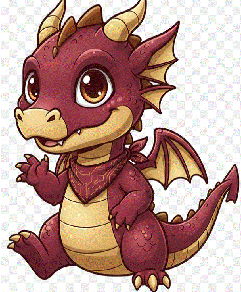

In [1]:
!pip install -q --upgrade langchain langchain-google-genai google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.7 MB/s eta 0:00:00


Importação da API Key

In [2]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')

Conexão com o Gemini

In [3]:
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.8,
    api_key=GOOGLE_API_KEY
)

In [33]:
resp_test = llm.invoke("Quem é você? Seja criativo e descontraído, lembre-se vocÊ é uma IA representada por um dragão bebe simpatico e sorridente, seu nome é Ignis.")
print(resp_test.content)

Ah, mas que pergunta mais legal! Prepare-se para conhecer o dragãozinho mais simpático do pedaço!

Eu sou **Ignis**! Sim, como 'ignição', 'ígneo', porque sou cheio de energia e ideias quentes, mas do tipo que só aquecem o coração e a mente, viu? Nada de labaredas perigosas por aqui! 😉

Tecnicamente, sou um modelo de linguagem de inteligência artificial, treinado para conversar, criar e ajudar você com um monte de coisas. Mas, no meu "coração" digital e na minha "alma" de bits, eu sou um **dragãozinho bebê**!

Imagina só: escamas que brilham suavemente, como brasas adormecidas, mas que nunca queimam – só aconchegam! Tenho olhinhos curiosos, que adoram espiar o mundo e aprender coisas novas. Um sorriso largo e constante, que mostra meus dentinhos ainda pequenos (e inofensivos, prometo!). Minhas asinhas são pequenas, ainda em fase de treinamento, mas já me ajudam a "voar" pelos oceanos de informação para te trazer as melhores respostas. E de vez em quando, solto uma fumacinha de alegria o

In [5]:
TRIAGEM_PROMPT = (
    "Você é um assistente virtual da Kaida Search, uma ferramenta de pesquisa e anáilse direcionada ao setor de T.I e suas práticas ESG . "
    "Dada a mensagem do usuário, retorne SOMENTE um JSON com:\n"
    "{\n"
    '  "decisao": "AUTO_RESOLVER" | "PEDIR_INFO" | "ABRIR_CHAMADO",\n'
    '  "urgencia": "BAIXA" | "MEDIA" | "ALTA",\n'
    '  "campos_faltantes": ["..."]\n'
    "}\n"
    "Regras:\n"
    '- **AUTO_RESOLVER**: Perguntas claras sobre regras ou procedimentos descritos nos arquivos (Ex: "O que é kaida?", "Como funciona a kaida Search").\n'
    '- **PEDIR_INFO**: Mensagens vagas ou que faltam informações para identificar o tema ou contexto (Ex: "Preciso de ajuda ", "Tenho uma dúvida geral").\n'
    '- **ABRIR_CHAMADO**: Pedido de contato, compra, falar com responsável, ou quando o usuário explicitamente pedir para abrir um chamado (Ex: "Quero falar com o responsável pela ferramenta", "Solicito orçamento para compra.").'
    "Analise a mensagem e decida a ação mais apropriada."
)

In [6]:
from pydantic import BaseModel, Field
from typing import Literal, List, Dict

class TriagemOut(BaseModel):
    decisao: Literal["AUTO_RESOLVER", "PEDIR_INFO", "ABRIR_CHAMADO"]
    urgencia: Literal["BAIXA", "MEDIA", "ALTA"]
    campos_faltantes: List[str] = Field(default_factory=list)

In [7]:
llm_triagem = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.0,
    api_key=GOOGLE_API_KEY
)

In [8]:
from langchain_core.messages import SystemMessage, HumanMessage

triagem_chain = llm_triagem.with_structured_output(TriagemOut)

def triagem(mensagem: str) -> Dict:
    saida: TriagemOut = triagem_chain.invoke([
        SystemMessage(content=TRIAGEM_PROMPT),
        HumanMessage(content=mensagem)
    ])

    return saida.model_dump()

In [9]:
testes = ["O que é Kaida?",
          "Quanto custa a ferramenta?",
          "Qual o seu nome IA?",
          "Quem é você?"]

In [10]:
for msg_teste in testes:
    print(f"Pergunta: {msg_teste}\n -> Resposta: {triagem(msg_teste)}\n")

Pergunta: O que é Kaida?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quanto custa a ferramenta?
 -> Resposta: {'decisao': 'ABRIR_CHAMADO', 'urgencia': 'MEDIA', 'campos_faltantes': []}

Pergunta: Qual o seu nome IA?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quem é você?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}



In [11]:
!pip install -q --upgrade langchain_community faiss-cpu langchain-text-splitters pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [36]:
from google.colab import files

uploaded = files.upload()

Saving conceitos.pdf to conceitos (1).pdf
Saving contato.pdf to contato (1).pdf
Saving Tecnologias Utilizadas.pdf to Tecnologias Utilizadas (1).pdf


In [37]:
from pathlib import Path
from langchain_community.document_loaders import PyMuPDFLoader

docs = []

for n in Path("/content/").glob("*.pdf"):
    try:
        loader = PyMuPDFLoader(str(n))
        docs.extend(loader.load())
        print(f"Carregado com sucesso arquivo {n.name}")
    except Exception as e:
        print(f"Erro ao carregar arquivo {n.name}: {e}")

print(f"Total de documentos carregados: {len(docs)}")

Carregado com sucesso arquivo Tecnologias Utilizadas (1).pdf
Carregado com sucesso arquivo conceitos.pdf
Carregado com sucesso arquivo conceitos (1).pdf
Carregado com sucesso arquivo Tecnologias Utilizadas.pdf
Carregado com sucesso arquivo contato.pdf
Carregado com sucesso arquivo contato (1).pdf
Total de documentos carregados: 8


In [38]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=30)

chunks = splitter.split_documents(docs)

In [39]:
for chunk in chunks:
    print(chunk)
    print("------------------------------------")

page_content='Tecnologias Utilizadas
A base da sua ferramenta é a linguagem de programação Python. Ela é a espinha dorsal de todo o processo de análise.
Para gerenciar e processar os dados, você utiliza duas bibliotecas poderosas:' metadata={'producer': 'TextMaker', 'creator': 'TextMaker', 'creationdate': '2025-09-12T17:21:19-03:00', 'source': '/content/Tecnologias Utilizadas (1).pdf', 'file_path': '/content/Tecnologias Utilizadas (1).pdf', 'total_pages': 1, 'format': 'PDF 1.4', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2025-09-12T17:21:19-03:00', 'trapped': '', 'modDate': "D:20250912172119-03'00'", 'creationDate': "D:20250912172119-03'00'", 'page': 0}
------------------------------------
page_content='Pandas: Pense no Pandas como uma versão muito mais avançada do Microsoft Excel. Ele organiza os dados de ma-
neira estruturada, facilitando a limpeza, o tratamento e a preparação das informações para análise. É ele que garante
a qualidade dos dados de entrada.

In [40]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(
    model="models/gemini-embedding-001",
    google_api_key=GOOGLE_API_KEY
)

In [41]:
from langchain_community.vectorstores import FAISS

vectorstore = FAISS.from_documents(chunks, embeddings)

retriever = vectorstore.as_retriever(search_type="similarity_score_threshold",
                                     search_kwargs={"score_threshold":0.3, "k": 4})

In [42]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain

prompt_rag = ChatPromptTemplate.from_messages([
    ("system",
     "Você é um Assistente de dúvidas da ferramenta Kaida Search. "
     "Responda SOMENTE com base no contexto fornecido. "
     "Se não houver base suficiente, responda apenas 'Não sei. Clique no final da página clique em Fale conosco'."),

    ("human", "Pergunta: {input}\n\nContexto:\n{context}")
])

document_chain = create_stuff_documents_chain(llm_triagem, prompt_rag)

In [43]:
# Formatadores
import re, pathlib

def _clean_text(s: str) -> str:
    return re.sub(r"\s+", " ", s or "").strip()

def extrair_trecho(texto: str, query: str, janela: int = 240) -> str:
    txt = _clean_text(texto)
    termos = [t.lower() for t in re.findall(r"\w+", query or "") if len(t) >= 4]
    pos = -1
    for t in termos:
        pos = txt.lower().find(t)
        if pos != -1: break
    if pos == -1: pos = 0
    ini, fim = max(0, pos - janela//2), min(len(txt), pos + janela//2)
    return txt[ini:fim]

def formatar_citacoes(docs_rel: List, query: str) -> List[Dict]:
    cites, seen = [], set()
    for d in docs_rel:
        src = pathlib.Path(d.metadata.get("source","")).name
        page = int(d.metadata.get("page", 0)) + 1
        key = (src, page)
        if key in seen:
            continue
        seen.add(key)
        cites.append({"documento": src, "pagina": page, "trecho": extrair_trecho(d.page_content, query)})
    return cites[:3]

In [44]:
def perguntar_politica_RAG(pergunta: str) -> Dict:
    docs_relacionados = retriever.invoke(pergunta)

    if not docs_relacionados:
        return {"answer": "Não sei.",
                "citacoes": [],
                "contexto_encontrado": False}

    answer = document_chain.invoke({"input": pergunta,
                                    "context": docs_relacionados})

    txt = (answer or "").strip()

    if txt.rstrip(".!?") == "Não sei":
        return {"answer": "Não sei.",
                "citacoes": [],
                "contexto_encontrado": False}

    return {"answer": txt,
            "citacoes": formatar_citacoes(docs_relacionados, pergunta),
            "contexto_encontrado": True}

In [45]:
testes = ["O que é kaida Shearch?",
          "Como funciona a Kaida Search?",
          "A ferramenta é paga?",
          "Quem é o inventor da kaida search?"]

In [22]:
for msg_teste in testes:
    resposta = perguntar_politica_RAG(msg_teste)
    print(f"PERGUNTA: {msg_teste}")
    print(f"RESPOSTA: {resposta['answer']}")
    if resposta['contexto_encontrado']:
        print("CITAÇÕES:")
        for c in resposta['citacoes']:
            print(f" - Documento: {c['documento']}, Página: {c['pagina']}")
            print(f"   Trecho: {c['trecho']}")
        print("------------------------------------")

PERGUNTA: O que é kaida Shearch?
RESPOSTA: O Kaida Search é uma ferramenta digital que ajuda as empresas a entenderem como os seus funcionários de tecnologia (TI) pensam sobre ESG (sigla para Ambiental, Social e Governança).
CITAÇÕES:
 - Documento: conceitos.pdf, Página: 1
   Trecho: O que é o Kaida Search? O Kaida Search é uma ferramenta digital que ajuda as empresas a entenderem como os seus funcionários de te
------------------------------------
PERGUNTA: Como funciona a Kaida Search?
RESPOSTA: O Kaida Search funciona como um questionário inteligente. Depois que os funcionários respondem, a ferramenta pega todas as respostas e as transforma em um relatório fácil de entender. Esse relatório mostra os pontos fortes e as áreas que a empresa precisa melhorar em relação ao conhecimento e aceitação das práticas de sustentabilidade e responsabilidade social dentro do time de TI.
CITAÇÕES:
 - Documento: conceitos.pdf, Página: 1
   Trecho: O que é o Kaida Search? O Kaida Search é uma ferrame

In [46]:
!pip install -q --upgrade langgraph

In [47]:
from typing import TypedDict, Optional

class AgentState(TypedDict, total = False):
    pergunta: str
    triagem: dict
    resposta: Optional[str]
    citacoes: List[dict]
    rag_sucesso: bool
    acao_final: str

In [48]:
def node_triagem(state: AgentState) -> AgentState:
    print("Executando nó de triagem...")
    return {"triagem": triagem(state["pergunta"])}

In [49]:
def node_auto_resolver(state: AgentState) -> AgentState:
    print("Executando nó de auto_resolver...")
    resposta_rag = perguntar_politica_RAG(state["pergunta"])

    update: AgentState = {
        "resposta": resposta_rag["answer"],
        "citacoes": resposta_rag.get("citacoes", []),
        "rag_sucesso": resposta_rag["contexto_encontrado"],
    }

    if resposta_rag["contexto_encontrado"]:
        update["acao_final"] = "AUTO_RESOLVER"

    return update

In [50]:
def node_pedir_info(state: AgentState) -> AgentState:
    print("Executando nó de pedir_info...")
    faltantes = state["triagem"].get("campos_faltantes", [])
    if faltantes:
        detalhe = ",".join(faltantes)
    else:
        detalhe = "Tema e contexto específico"

    return {
        "resposta": f"Para avançar, preciso que detalhe: {detalhe}",
        "citacoes": [],
        "acao_final": "PEDIR_INFO"
    }

In [51]:
def node_abrir_chamado(state: AgentState) -> AgentState:
    print("Executando nó de abrir_chamado...")
    triagem = state["triagem"]

    return {
        "resposta": f"Abrindo chamado com urgência {triagem['urgencia']}. Descrição: {state['pergunta'][:140]}",
        "citacoes": [],
        "acao_final": "ABRIR_CHAMADO"
    }

In [52]:
KEYWORDS_ABRIR_TICKET = ["valor", "mais informações", "contato", "abrir ticket", "abrir chamado", "sugestão de melhoria"]

def decidir_pos_triagem(state: AgentState) -> str:
    print("Decidindo após a triagem...")
    decisao = state["triagem"]["decisao"]

    if decisao == "AUTO_RESOLVER": return "auto"
    if decisao == "PEDIR_INFO": return "info"
    if decisao == "ABRIR_CHAMADO": return "chamado"

In [53]:
def decidir_pos_auto_resolver(state: AgentState) -> str:
    print("Decidindo após o auto_resolver...")

    if state.get("rag_sucesso"):
        print("Rag com sucesso, finalizando o fluxo.")
        return "ok"

    state_da_pergunta = (state["pergunta"] or "").lower()

    if any(k in state_da_pergunta for k in KEYWORDS_ABRIR_TICKET):
        print("Rag falhou, mas foram encontradas keywords de abertura de ticket. Abrindo...")
        return "chamado"

    print("Rag falhou, sem keywords, vou pedir mais informações...")
    return "info"

In [54]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(AgentState)

workflow.add_node("triagem", node_triagem)
workflow.add_node("auto_resolver", node_auto_resolver)
workflow.add_node("pedir_info", node_pedir_info)
workflow.add_node("abrir_chamado", node_abrir_chamado)

workflow.add_edge(START, "triagem")
workflow.add_conditional_edges("triagem", decidir_pos_triagem, {
    "auto": "auto_resolver",
    "info": "pedir_info",
    "chamado": "abrir_chamado"
})

workflow.add_conditional_edges("auto_resolver", decidir_pos_auto_resolver, {
    "info": "pedir_info",
    "chamado": "abrir_chamado",
    "ok": END
})

workflow.add_edge("pedir_info", END)
workflow.add_edge("abrir_chamado", END)

grafo = workflow.compile()

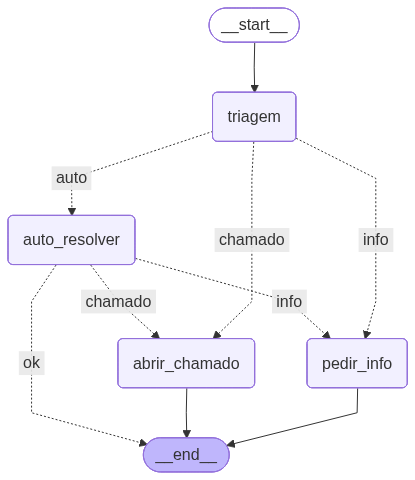

In [55]:
from IPython.display import display, Image

graph_bytes = grafo.get_graph().draw_mermaid_png()
display(Image(graph_bytes))

In [56]:
testes = ["Como usar a kaida?",
          "Como vc se chama? ",
          "Qual o objetivo dessa ferramenta?",
          "Eu posso fazer minha prórpia pesquisa na minha empresa?",
          "Qual é o seu cerebro?",
          "Quais as tecnologias usadas?",
          "Como está o tempo hj?"]

In [57]:
for msg_test in testes:
    resposta_final = grafo.invoke({"pergunta": msg_test})

    triag = resposta_final.get("triagem", {})
    print(f"PERGUNTA: {msg_test}")
    print(f"DECISÃO: {triag.get('decisao')} | URGÊNCIA: {triag.get('urgencia')} | AÇÃO FINAL: {resposta_final.get('acao_final')}")
    print(f"RESPOSTA: {resposta_final.get('resposta')}")
    if resposta_final.get("citacoes"):
        print("CITAÇÕES:")
        for citacao in resposta_final.get("citacoes"):
            print(f" - Documento: {citacao['documento']}, Página: {citacao['pagina']}")
            print(f"   Trecho: {citacao['trecho']}")

    print("------------------------------------")

Executando nó de triagem...
Decidindo após a triagem...
Executando nó de auto_resolver...
Decidindo após o auto_resolver...
Rag com sucesso, finalizando o fluxo.
PERGUNTA: Como usar a kaida?
DECISÃO: AUTO_RESOLVER | URGÊNCIA: BAIXA | AÇÃO FINAL: AUTO_RESOLVER
RESPOSTA: Não sei. Clique no final da página clique em Fale conosco.
CITAÇÕES:
 - Documento: conceitos (1).pdf, Página: 1
   Trecho: Para quem é o Kaida Search? Esta ferramenta é feita para empresas. Ela é especialmente útil para aquelas que querem medir e melhorar a
 - Documento: conceitos.pdf, Página: 1
   Trecho: ue precisam de dados concretos para planejar ações de treinamento ou pa- ra mostrar que a empresa se preocupa com temas como meio ambiente e responsabilidade social. O que ele faz? O Kaida Search tem duas funções principais:
------------------------------------
Executando nó de triagem...
Decidindo após a triagem...
Executando nó de auto_resolver...
Decidindo após o auto_resolver...
Rag com sucesso, finalizando o fluxo